# Association Rule Mining

Top 10 Association Rules:
        antecedents                           consequents  antecedent support  \
2479493         (f)  (l, o, r, e, t, h, p, _, s, i, n, a)            0.000114   
1791492   (s, i, o)                    (r, l, e, t, p, n)            0.000114   
1791482   (s, o, t)                    (r, l, e, p, i, n)            0.000114   
1791483   (n, o, t)                    (r, l, e, p, s, i)            0.000114   
1791484   (i, o, t)                    (r, l, e, p, s, n)            0.000114   
1791487   (p, s, o)                    (r, l, e, t, i, n)            0.000114   
1791488   (p, o, n)                    (r, l, e, t, s, i)            0.000114   
1791489   (p, i, o)                    (r, l, e, t, s, n)            0.000114   
1791491   (s, o, n)                    (r, l, e, t, p, i)            0.000114   
1791494      (r, l)                 (e, t, p, s, i, n, o)            0.000114   

         consequent support   support  confidence    lift  leverage  \
2479493    

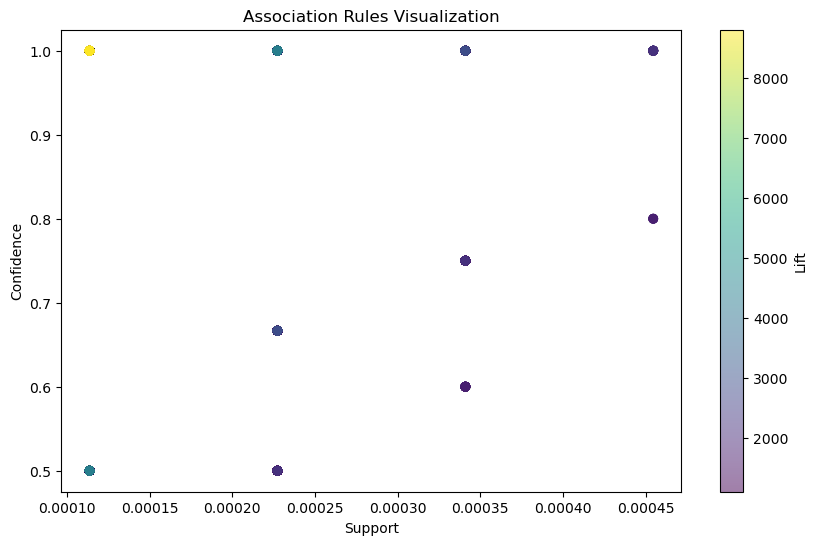

In [14]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('../data/cleaned_dataset.csv')

# Prepare the transactions
def prepare_transactions(df):
    # Select relevant columns for association rule mining
    # This is an example - you'll need to adjust based on your specific dataset
    transaction_columns = ['adaptability', 'moving_around', 'big_tech_experience', 'startup_experience', 'professional_athlete']
    
    # Convert columns to categorical lists
    transactions = df[transaction_columns]
    
    # Convert to transaction format
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    transactions_df = pd.DataFrame(te_ary, columns=te.columns_)
    
    return transactions_df

# Perform association rule mining
def mine_associations(transactions_df, min_support=0.000001, min_confidence=0.5):
    # Find frequent itemsets
    frequent_itemsets = apriori(
        transactions_df, 
        min_support=min_support, 
        use_colnames=True
    )
    
    # Generate association rules
    rules = association_rules(
        frequent_itemsets, 
        metric="confidence", 
        min_threshold=min_confidence
    )
    
    return frequent_itemsets, rules

# Visualize and analyze rules
def analyze_rules(rules):
    # Sort rules by lift
    sorted_rules = rules.sort_values('lift', ascending=False)
    
    # Top 10 most interesting rules
    print("Top 10 Association Rules:")
    print(sorted_rules.head(10))
    
    # Visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(10, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5, 
                c=rules['lift'], cmap='viridis')
    plt.colorbar(label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules Visualization')
    plt.show()


# Prepare transactions
transactions_df = prepare_transactions(df)

# Mine associations
frequent_itemsets, rules = mine_associations(transactions_df)

# Analyze rules
analyze_rules(rules)

# Optional: Save results
rules.to_csv('../data/association_rules.csv', index=False)
frequent_itemsets.to_csv('../data/frequent_itemsets.csv', index=False)
